<a href="https://colab.research.google.com/github/AndriuGJ/PredecirNumero/blob/main/Numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


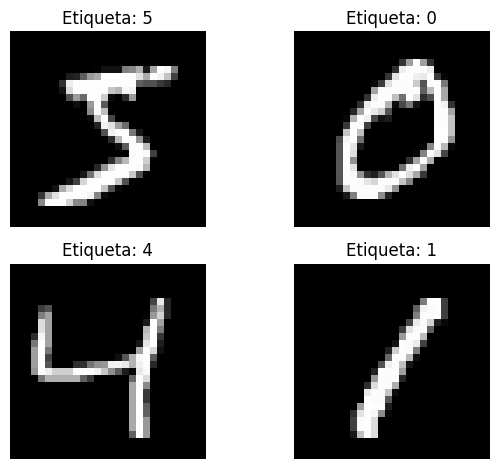

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure()
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [12]:
cnn_model.fit(X_train, y_train,
              epochs=5, batch_size=32,
              validation_data=(X_test, y_test))

Epoch 1/5
  79/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.9941 - loss: 0.0157

KeyboardInterrupt: 

In [7]:
_, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"La accuracy es: {accuracy * 100:.2f}%")
# La accuracy es: 99.23%


La accuracy es: 98.90%


In [9]:
predicciones = cnn_model.predict(X_test[0:2])
esperado = y_test[0:2]
for p, e in zip(predicciones, esperado):
    prediccion = np.argmax(p)
    print(f"Esperado: {e}. Predicción: {prediccion}")

# Esperado: 7. Predicción: 7
# Esperado: 2. Predicción: 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Esperado: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]. Predicción: 7
Esperado: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]. Predicción: 2
